In [1]:
import os 
import numpy as np 
import pandas as pd 

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import confusion_matrix 

import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV, cross_val_score

In [2]:
bank = pd.read_csv('/Users/mac/Desktop/The Data Science Project /data/UnivBank.csv', na_values=["?",",","#"])
type(bank)

pandas.core.frame.DataFrame

In [3]:
bank.head(3)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0.0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0.0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0.0,0,0,0,0,0


In [4]:
print(bank.shape)
print(type(bank))
print(bank.columns)
print(bank.dtypes)

(5000, 14)
<class 'pandas.core.frame.DataFrame'>
Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')
ID                     int64
Age                    int64
Experience             int64
Income                 int64
ZIPCode                int64
Family                 int64
CCAvg                float64
Education              int64
Mortgage             float64
PersonalLoan           int64
SecuritiesAccount      int64
CDAccount              int64
Online                 int64
CreditCard             int64
dtype: object


In [5]:
bank.isna().sum()

ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             3
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

In [6]:
bank = bank.fillna(bank.mean()) #Impute missing values 

In [8]:
bank.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.532720,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.704379,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [9]:
bank['Education'] = bank['Education'].astype('category')

In [10]:
bank= pd.get_dummies(bank, drop_first=True)

In [11]:
bank.head(5) #LP3RJR9W

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,Education_2,Education_3
0,1,25,1,49,91107,4,1.6,0.0,0,1,0,0,0,0,0
1,2,45,19,34,90089,3,1.5,0.0,0,1,0,0,0,0,0
2,3,39,15,11,94720,1,1.0,0.0,0,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,0.0,0,0,0,0,0,1,0
4,5,35,8,45,91330,4,1.0,0.0,0,0,0,0,1,1,0


In [13]:
#Split Data into train and Test 
y = bank['PersonalLoan']
X= bank.drop('PersonalLoan', axis=1)
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.20)

In [14]:
#Print dimensions of splits 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 14)
(1000, 14)
(4000,)
(1000,)


In [15]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
#Standardize features for train and test 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
#Display training data 
X_train[:3]

array([[ 0.50847819, -0.11475106, -0.53087236, -1.17954223,  0.4407241 ,
        -1.21214175, -0.6751702 , -0.54656476, -0.34206202, -0.25320505,
        -1.22156123,  1.53942844, -0.63173617,  1.51938127],
       [-0.19578187,  0.58441762,  0.16853542, -0.3373861 , -0.0182506 ,
         1.38855572,  0.0380699 ,  1.62771075, -0.34206202, -0.25320505,
         0.81862454, -0.64959174, -0.63173617,  1.51938127],
       [ 0.83463993, -0.20214714, -0.18116847, -0.83404228, -0.22435794,
        -1.21214175, -0.76075901, -0.54656476, -0.34206202, -0.25320505,
        -1.22156123, -0.64959174, -0.63173617,  1.51938127]])

In [19]:
#Building the KNN Classifier Model 
model = KNeighborsClassifier(algorithm='brute', n_neighbors=5, metric='euclidean')
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [20]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [21]:
# Find accuracy classification score 
from sklearn.metrics import accuracy_score 
print(accuracy_score(y_test,y_pred))

0.95


In [22]:
# Creating odd list of K for KNN
myList = list(range(1,50))

# Empty list that will hold cv scores
cv_scores = []

# Perform 5-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [23]:
cv_scores

[0.95175,
 0.9477499999999999,
 0.9569999999999999,
 0.94725,
 0.95275,
 0.9467500000000001,
 0.9515,
 0.94475,
 0.9492499999999999,
 0.9430000000000002,
 0.9465000000000001,
 0.9417499999999999,
 0.9435,
 0.9409999999999998,
 0.9424999999999999,
 0.9395,
 0.9414999999999999,
 0.9385,
 0.9399999999999998,
 0.93625,
 0.93925,
 0.93575,
 0.93675,
 0.9342499999999999,
 0.9355,
 0.9324999999999999,
 0.9337499999999999,
 0.9324999999999999,
 0.933,
 0.9309999999999998,
 0.9324999999999999,
 0.931,
 0.931,
 0.93,
 0.93075,
 0.92925,
 0.93025,
 0.9272500000000001,
 0.9285,
 0.9277500000000002,
 0.929,
 0.9269999999999999,
 0.9272500000000001,
 0.9265000000000001,
 0.9272500000000001,
 0.9254999999999999,
 0.9262499999999999,
 0.9252499999999999,
 0.9259999999999999]

The optimal number of neighbors is 3


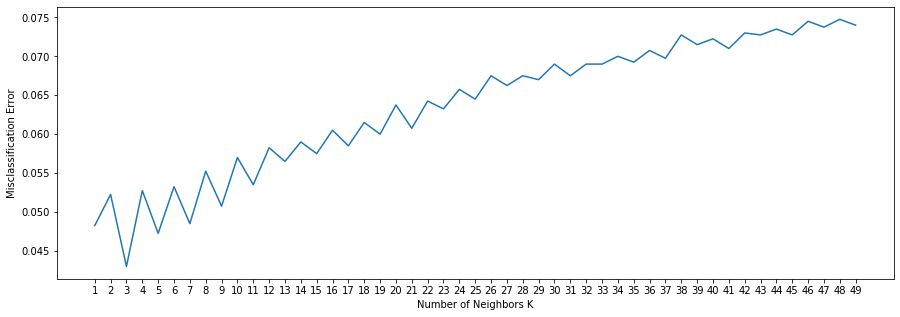

In [24]:
# Changing to misclassification error
MCE = [1 - x for x in cv_scores]

# Determining best k
optimal_k = myList[MCE.index(min(MCE))]
print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.figure(figsize=(15,5))
plt.plot(myList, MCE)
plt.xticks(np.arange(1, 50, 1))
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [25]:
#K-fold cross validation using GridSearchCV 
parameters = {'n_neighbors':list(range(2,15))}

clf = GridSearchCV(KNeighborsClassifier(algorithm = 'auto', metric="euclidean", n_jobs=-1),
                   parameters,verbose=1, cv=10)

clf.fit(X=X_train, y=y_train)

Fitting 10 folds for each of 13 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    6.6s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='euclidean',
                                            metric_params=None, n_jobs=-1,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [26]:
knn_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.9569999999999999 {'n_neighbors': 3}


In [27]:
#2. Predict on the test data using the best model 
y_pred_test=knn_model.predict(X_test)

In [28]:
#3. Compute confusion matrix to evaluate the accuracy of the classification 
print(confusion_matrix(y_test,y_pred_test))

[[900   5]
 [ 42  53]]


In [29]:
#Accuracy classification score 
print(accuracy_score(y_test,y_pred_test))

0.953


# Activity 2 : Regression 

In [31]:
from sklearn.neighbors import KNeighborsRegressor

In [32]:
#Generate random dataframe 
data = pd.DataFrame(np.random.randint(1,50,size=(1000,4)),columns=list('ABCT'))
data.head(2)

,A,B,C,T
0,22,43,22,15
1,44,16,16,24


In [33]:
#Split 
train, test = train_test_split(data, test_size=0.2)
print(train.shape, test.shape)

(800, 4) (200, 4)


In [34]:
#Extract Target col 
y_train = train['T']
y_test = test['T']

In [35]:
#Normalization using MInMax 
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(train.iloc[:,:3])
stdtrain = pd.DataFrame(scaler.transform(train.iloc[:,:3]), columns=list("abc"))
stdtest = pd.DataFrame(scaler.transform(test.iloc[:,:3]), columns=list("abc"))

In [36]:
print(stdtrain.head(3))
print(stdtest.head(3))

          a         b         c
0  0.375000  0.500000  0.625000
1  0.000000  0.833333  0.979167
2  0.104167  0.666667  0.208333
          a         b         c
0  0.229167  0.833333  0.208333
1  0.270833  0.687500  0.187500
2  0.729167  0.562500  0.895833


In [37]:
#display dimensions for normalised train and test 
print(stdtrain.shape)
print(y_train.shape)
print(stdtest.shape)
print(y_test.shape)

(800, 3)
(800,)
(200, 3)
(200,)


In [38]:
knn = KNeighborsRegressor(algorithm='brute', n_neighbors=5, metric='euclidean')
knn.fit(stdtrain,y_train)

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [39]:
predictions = knn.predict(stdtest)

In [40]:
def mse(predictions,y):
    mse = (((predictions - y) ** 2).sum()) / len(predictions)
    return mse

In [41]:
mse(predictions,y_test)

256.51579999999996